In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

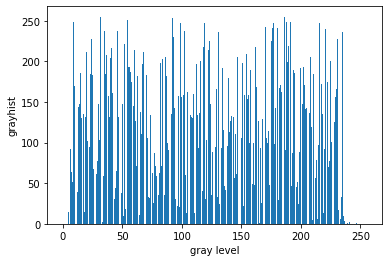

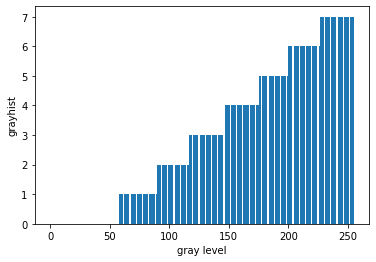

In [11]:

def calhist(image):
    rows,cols=image.shape[0:2]
    grayhist=np.zeros([256],np.uint8)
    for h in range(rows):
        for w in range(cols):
            grayhist[image[h][w]]+=1
    return grayhist

def drawhist(hist):
    xrange=range(256)
    plt.bar(xrange,hist)
    plt.xlabel('gray level')
    plt.ylabel('grayhist')
    plt.show()
    
def equalhist(image):
    rows,cols=image.shape[0:2]
    orignialhist=calhist(image)
    #计算累加直方图
    sum_of_orignialhist=np.zeros([256],np.uint32)
    for p in range(256):
        if p==0:
            sum_of_orignialhist[p]=orignialhist[0]
        else:
            sum_of_orignialhist[p]=sum_of_orignialhist[p-1]+orignialhist[p]
    #根据公式进行计算
    outputhist=np.zeros([256],np.uint32)
    a=256.0/(rows*cols)
    for p in range(256):
        q=a*float(sum_of_orignialhist[p])-1
        if q>=0:
            outputhist[p]=math.floor(q)
        else:
            outputhist[p]=0
    return outputhist        
    
            
def drawimage(outputhist,image):
    output_image=np.zeros(src.shape,np.uint8)
    rows,cols=image.shape[0:2]
    for r in range(rows):
        for c in range(cols):
            output_image[r][c]=outputhist[image[r][c]]
    return  output_image
    
                
if __name__=='__main__':
    file=r'C:\Users\luo yong chen\Pictures\touxiang.png'
    src=cv.imread(file)
    
    cv.imshow('input',src)
    grayhist=calhist(src)
    drawhist(grayhist)
    
    outputhist=equalhist(src)
    drawhist(outputhist)
    output_image=drawimage(outputhist,src)
    cv.imshow('output',output_image)
    
    cv.waitKey(0)
    cv.destroyAllWindows()
    

    
    